# Import data

In [3]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# Let's work on EDA

In [4]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

<Axes: xlabel='quality', ylabel='count'>

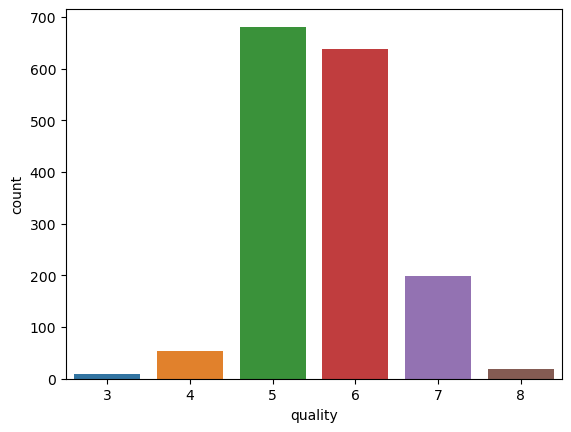

In [7]:
import seaborn as sns
sns.countplot(data=df, x='quality')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

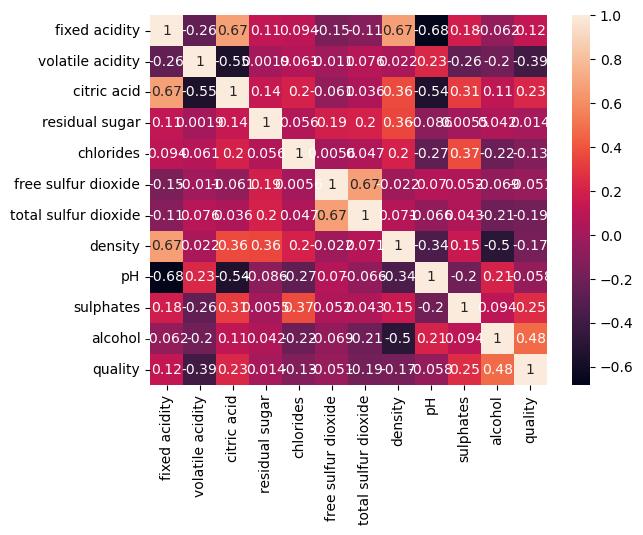

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)

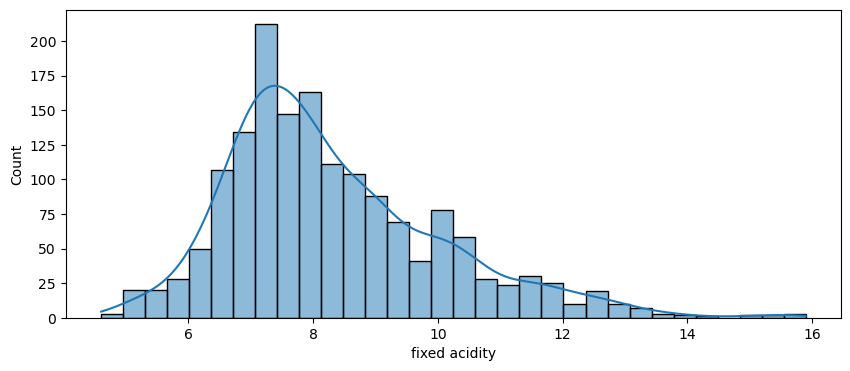

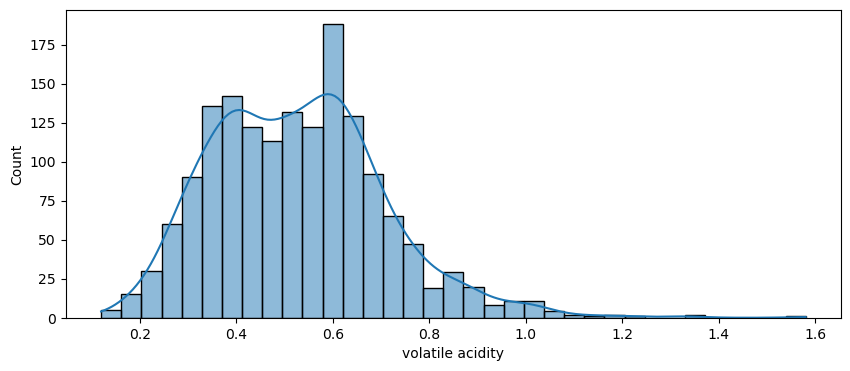

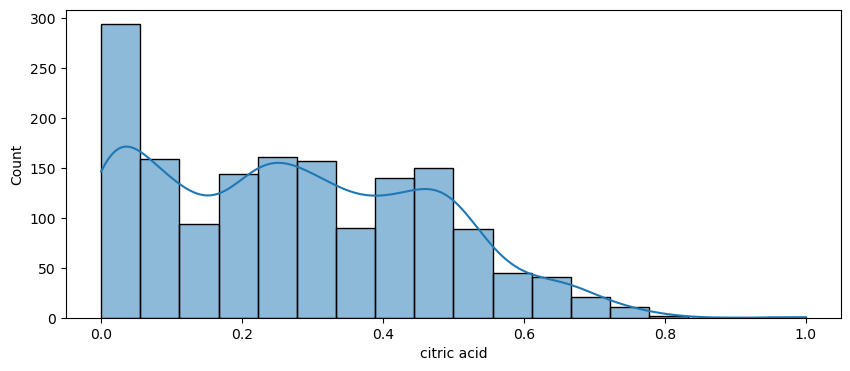

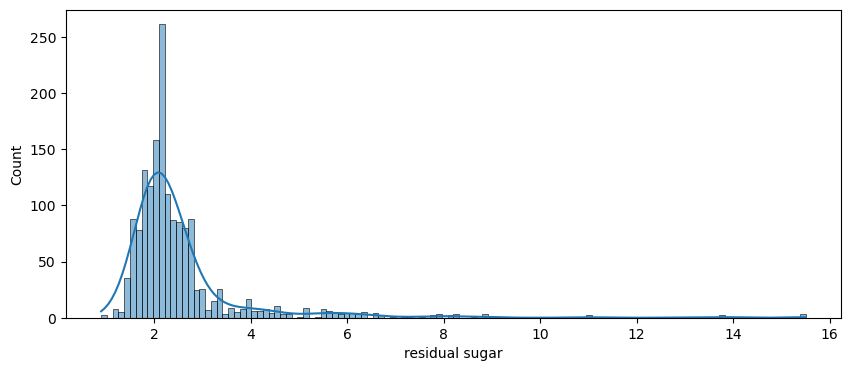

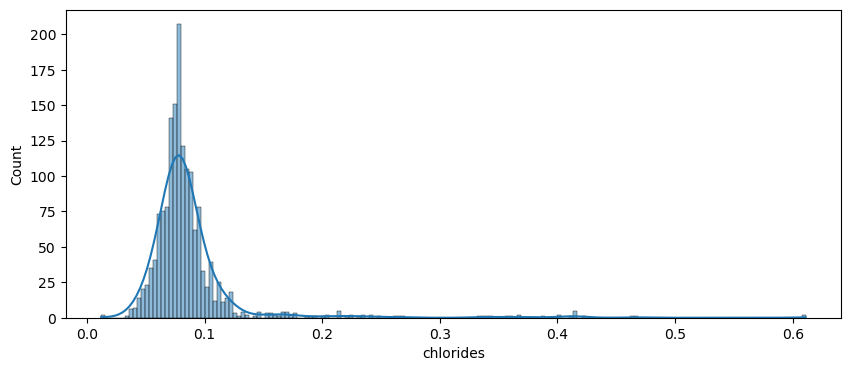

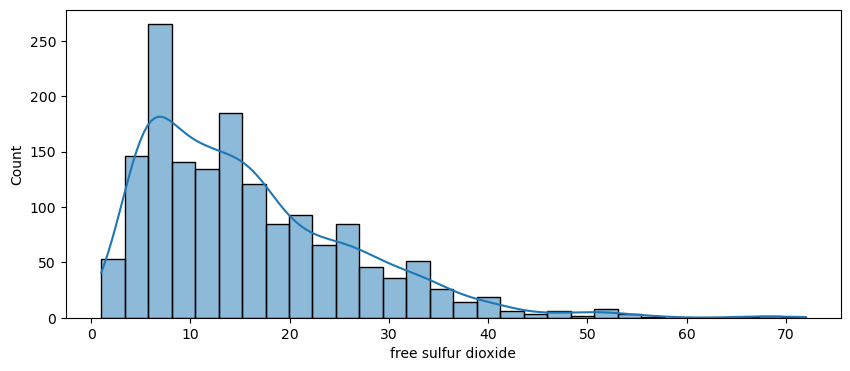

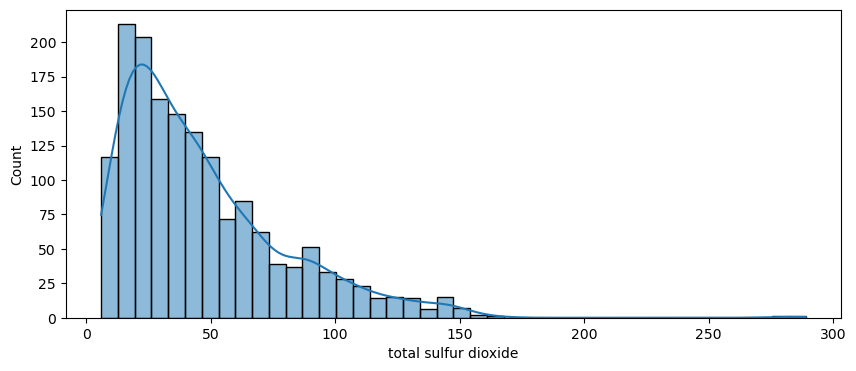

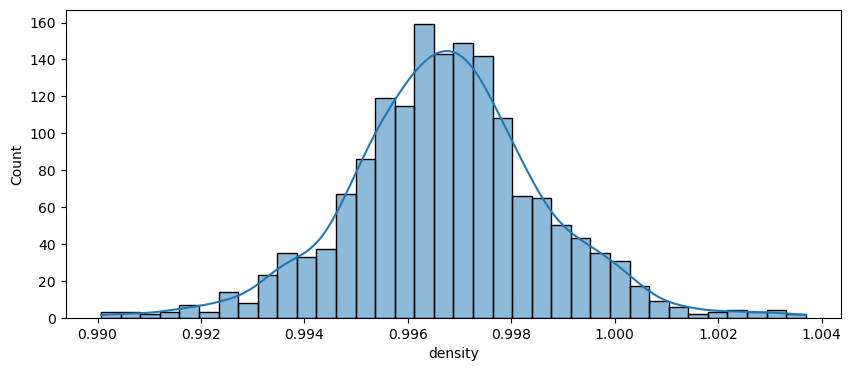

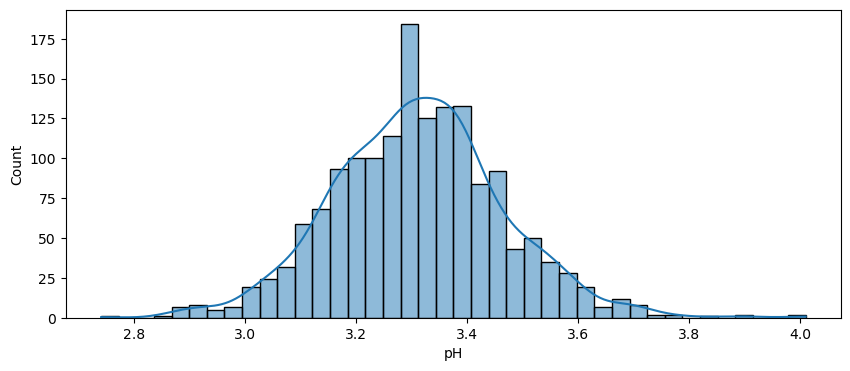

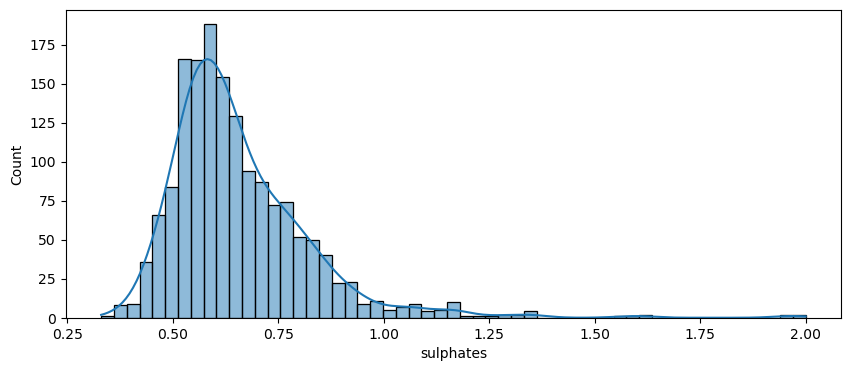

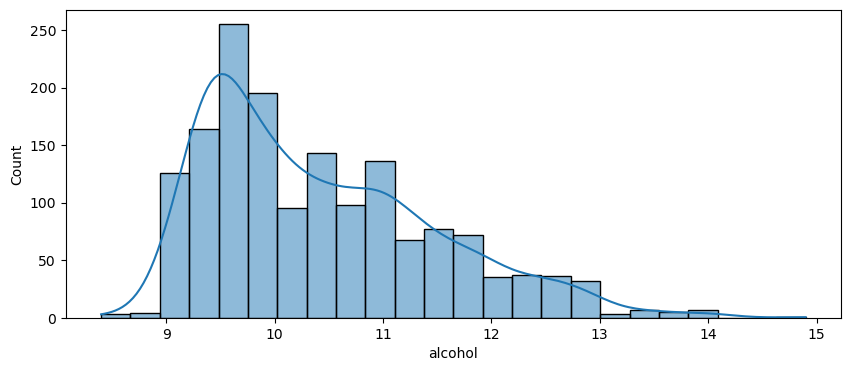

In [10]:
for col in df.columns[:-1]:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)

/home/az/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


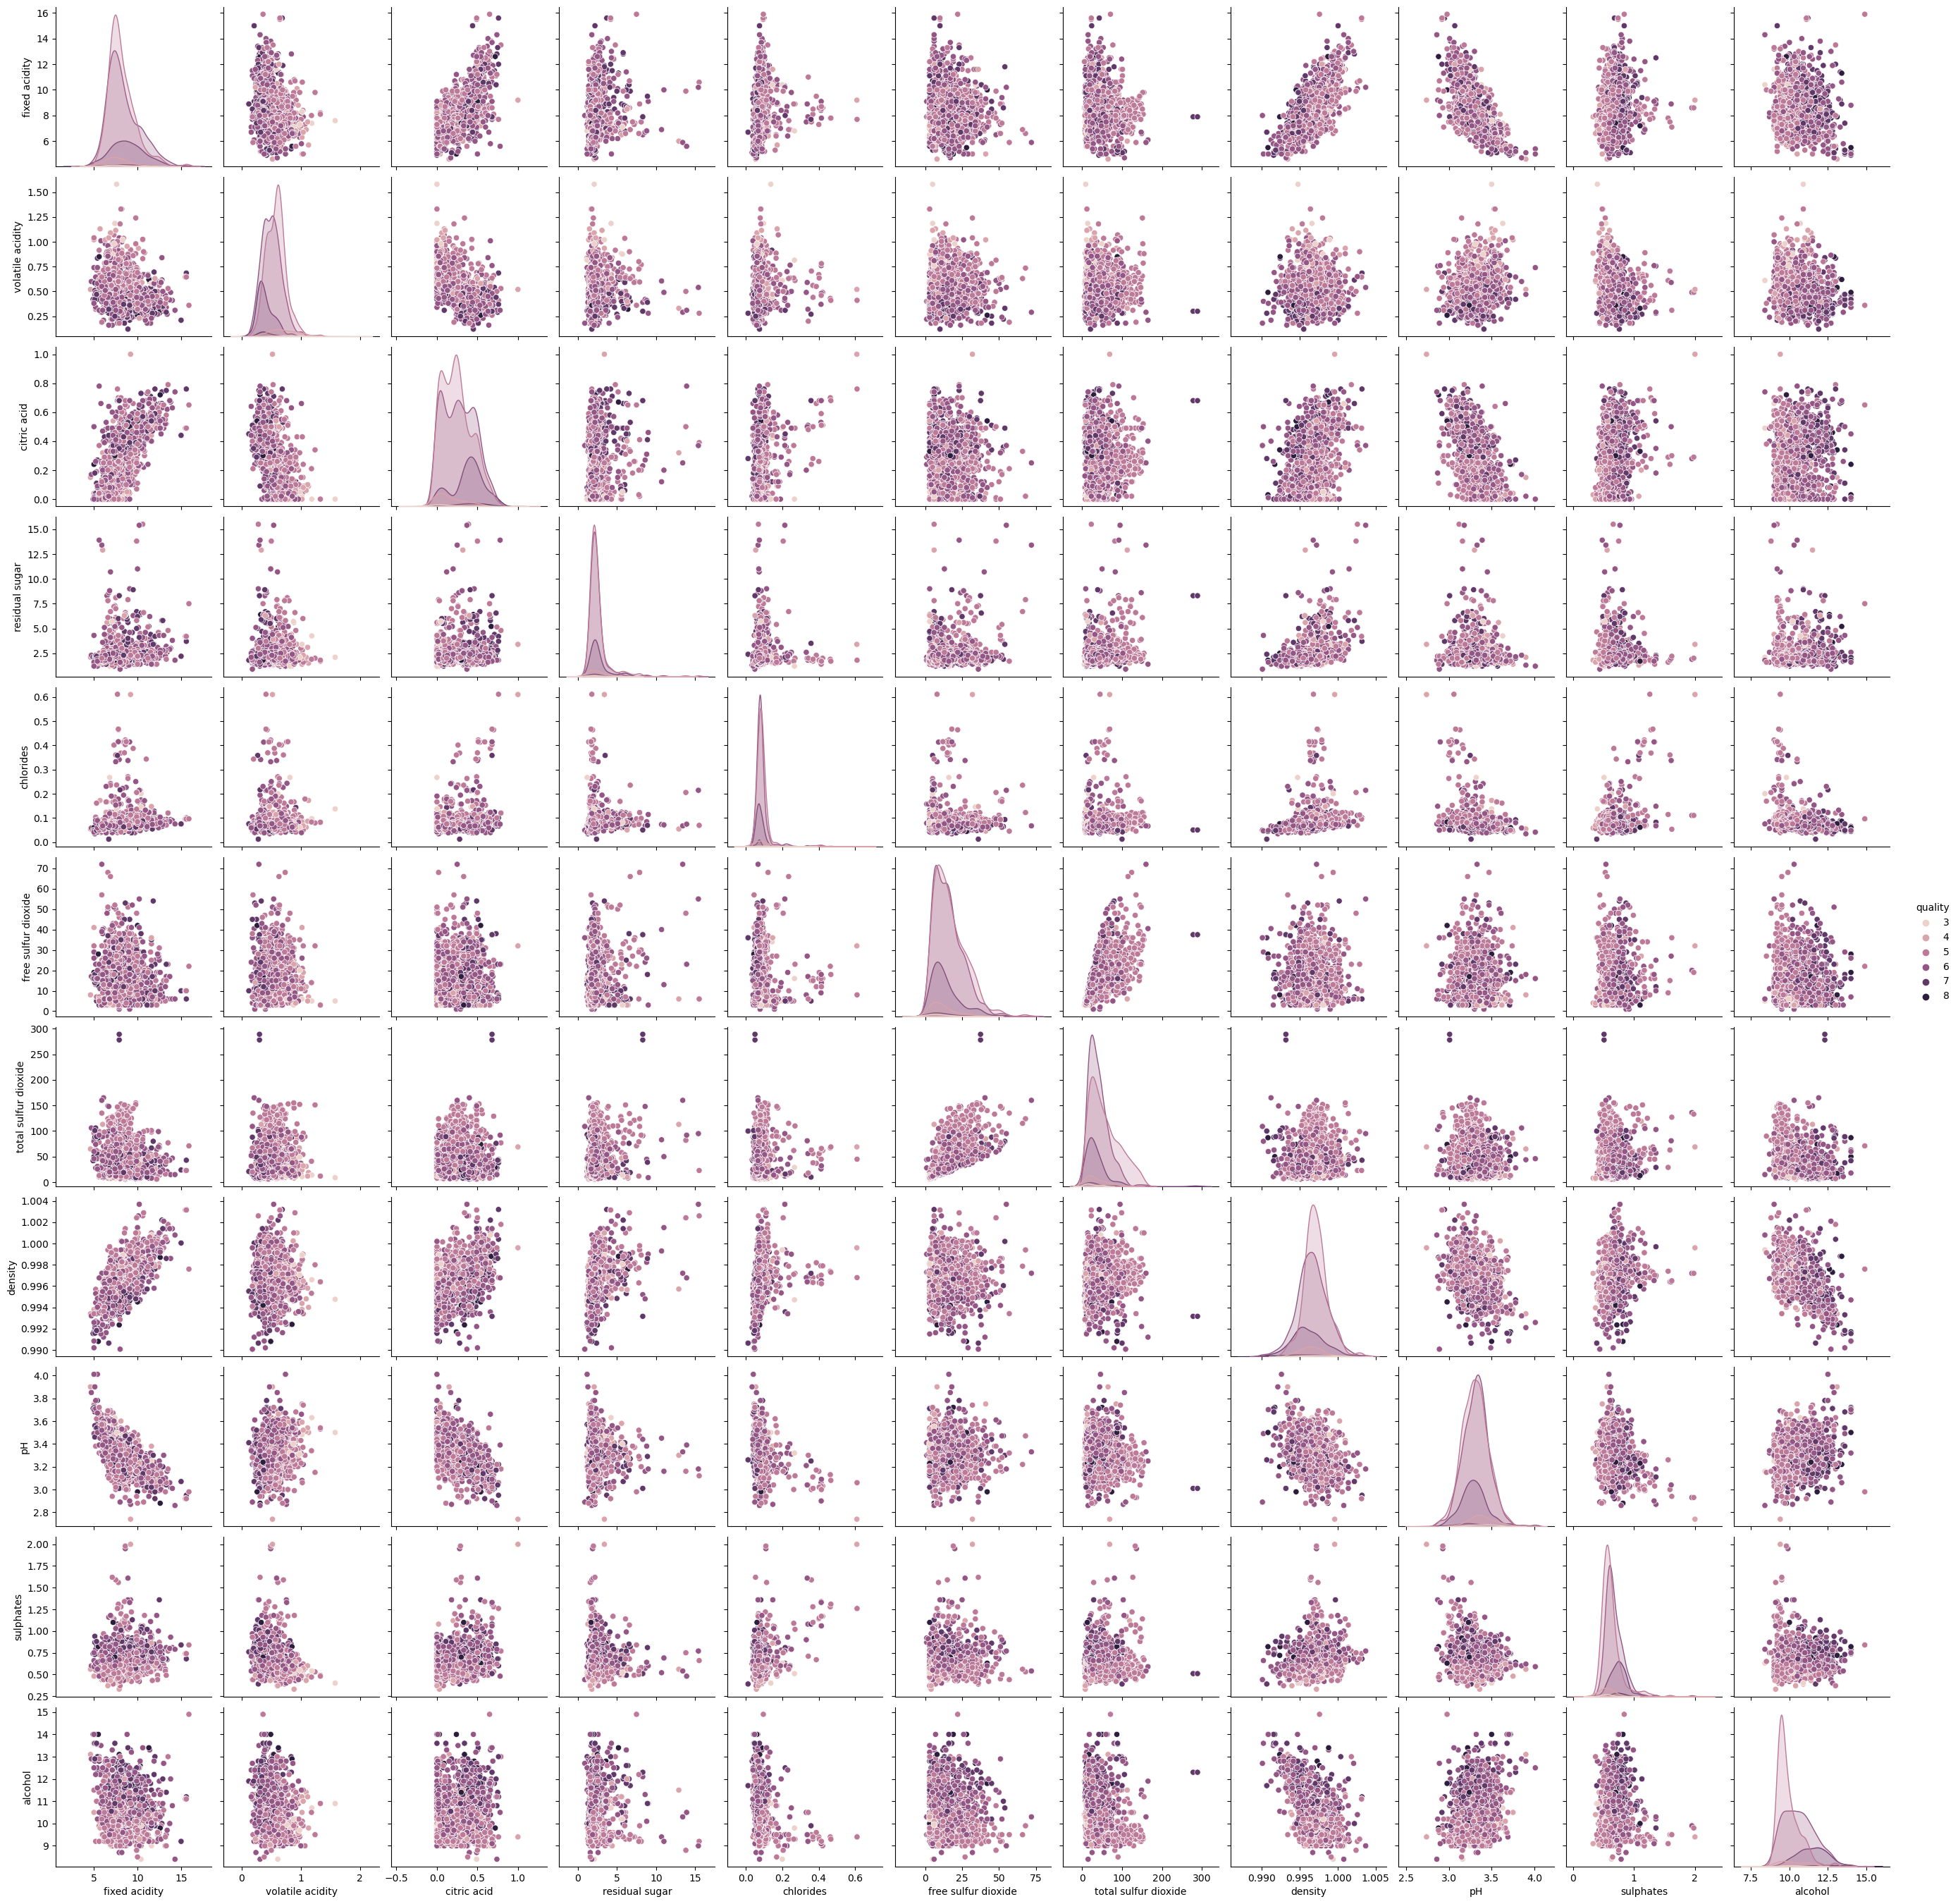

In [11]:
sns.pairplot(df, hue='quality')

# Creating a basic MLP

As required we'll create a basic MLP with the following specifications:
- One hidden layer with 5 units. 
- Optimizer: SGD (Stochastic Gradient Descent)
- Activation function: ReLU (Rectified Linear Units)
- Learning rate: 0.0001
- Performance metric: MSE (Mean Squared Error)

Given the MSE is a regression metric, I'll treat this as a regression problem. From the EDAs, the quality of the wine is discrete and ranges from 3 to 8. I'll predict the number directly and round it to the nearest integer.

1. split the data into training, validation and testing
2. move data to PyTorch ecosystem

In [13]:
import torch

In [14]:
# split data into train/validation/test
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [15]:

from sklearn.model_selection import train_test_split

train_x, everything_else_x, train_y, ee_y = train_test_split(X, Y, test_size=0.3, random_state=42)

In [18]:
valid_x, test_x, valid_y, test_y = train_test_split(everything_else_x, ee_y, test_size=0.5, random_state=42)

In [16]:
# move data to tensors

train_x = torch.tensor(train_x.to_numpy()).float()

In [19]:
test_x, valid_x = map(torch.tensor, (test_x.to_numpy(), valid_x.to_numpy()))
test_x = test_x.float()
valid_x = valid_x.float()

In [20]:
train_y, test_y, valid_y = map(torch.tensor, (train_y.to_numpy(), test_y.to_numpy(), valid_y.to_numpy()))

In [21]:
from torch.utils.data import Dataset

class WineDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [22]:
wine_train = WineDataset(train_x, train_y)

In [23]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=wine_train, batch_size=8)

In [24]:
class WineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(WineMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.outputs)
        
        self.relu = torch.nn.LeakyReLU()
        
    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [25]:
train_x.shape[1]

11

By design, the quality of the wine is a discrete number between 3 and 8. I'll treat this as a regression problem and predict the number directly.

In [27]:
model = WineMLP(n_inputs=train_x.shape[1], hidden_size=5, n_outputs=1)
model

WineMLP(
  (linear1): Linear(in_features=11, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)

In [32]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001)

In [30]:
epochs = 100

loss_valid = []
loss_train = []

for epoch in range(epochs):
    model.train()
    # Batch the data
    epoch_loss_train = []
    for features, targets in train_loader:
        output = model.forward(features) # Get model hypotheses
        # Calculate a loss
        loss = criterion(output, targets.float())
        epoch_loss_train.append(loss.item())
        optimirzer.zero_grad() # remove any previous losses
        loss.backward() # Calculate the current losses backward through the MLP
        optimizer.step() # Apply to the model itself
    # Calculate the training loss per epoch
    loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
    
    # Per epoch, get validation performance
    model.eval() # Puts the model in evaluation mode
    valid_hyp = model.forward(valid_x)
    loss_valid.append(criterion(valid_hyp, valid_y).item())
    c = torch.argmax(valid_hyp.data, dim=1)
    valid_accuracy = (c == valid_y).sum().item() / valid_x.shape[0]
    print('Epoch', epoch, 'train_loss', loss_train[-1], 'valid_loss', loss_valid[-1],
          'validation accuracy:', valid_accuracy)

/home/az/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/az/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/az/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([240])) that is different to the input size (torch.Size([240, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  re

Epoch 0 train_loss 11.823384485925947 valid_loss 4.236364364624023 validation accuracy: 0.0
Epoch 1 train_loss 2.4877713114023208 valid_loss 1.4193660020828247 validation accuracy: 0.0
Epoch 2 train_loss 1.2734236627817155 valid_loss 1.0896793603897095 validation accuracy: 0.0
Epoch 3 train_loss 1.1305869894368308 valid_loss 1.0143976211547852 validation accuracy: 0.0
Epoch 4 train_loss 1.0890036910772323 valid_loss 0.9800213575363159 validation accuracy: 0.0
Epoch 5 train_loss 1.0634951480797359 valid_loss 0.9552353024482727 validation accuracy: 0.0
Epoch 6 train_loss 1.041381300347192 valid_loss 0.9337053894996643 validation accuracy: 0.0
Epoch 7 train_loss 1.0213453365223748 valid_loss 0.9150735139846802 validation accuracy: 0.0
Epoch 8 train_loss 1.0030269133193153 valid_loss 0.8987511992454529 validation accuracy: 0.0
Epoch 9 train_loss 0.986341033237321 valid_loss 0.8841027617454529 validation accuracy: 0.0
Epoch 10 train_loss 0.971229272867952 valid_loss 0.8707049489021301 valid

In [33]:
epochs = 100

loss_valid = []
loss_train = []

for epoch in range(epochs):
    model.train()
    # Batch the data
    epoch_loss_train = []
    for features, targets in train_loader:
        output = model.forward(features) # Get model hypotheses
        # Calculate a loss
        loss = criterion(output.squeeze(), targets.float())  # ensure targets are float
        epoch_loss_train.append(loss.item())
        optimizer.zero_grad()  # Corrected variable name for optimizer
        loss.backward()  # Calculate the current losses backward through the MLP
        optimizer.step()  # Apply to the model itself
    # Calculate the training loss per epoch
    loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
    
    # Per epoch, get validation performance
    model.eval()  # Puts the model in evaluation mode
    with torch.no_grad():  # No need to track gradients for validation
        valid_hyp = model(valid_x.float())
        # Round predictions to nearest integer for evaluation
        rounded_preds = torch.round(valid_hyp.squeeze())
        valid_loss = criterion(rounded_preds, valid_y.float())
        loss_valid.append(valid_loss.item())
        # Calculate accuracy based on rounded predictions
        valid_accuracy = torch.mean((rounded_preds == valid_y.float()).float()).item()
        print(f'Epoch {epoch}, train_loss {loss_train[-1]}, valid_loss {loss_valid[-1]}, '
              f'validation accuracy: {valid_accuracy}')


Epoch 0, train_loss 0.5780398972332478, valid_loss 0.5958333611488342, validation accuracy: 0.5291666388511658
Epoch 1, train_loss 0.5705140563526324, valid_loss 0.5874999761581421, validation accuracy: 0.5375000238418579
Epoch 2, train_loss 0.569584446772933, valid_loss 0.5916666388511658, validation accuracy: 0.5333333611488342
Epoch 3, train_loss 0.5688127028622798, valid_loss 0.5916666388511658, validation accuracy: 0.5333333611488342
Epoch 4, train_loss 0.5679914038096155, valid_loss 0.5916666388511658, validation accuracy: 0.5333333611488342
Epoch 5, train_loss 0.5672622490408165, valid_loss 0.5916666388511658, validation accuracy: 0.5333333611488342
Epoch 6, train_loss 0.5665618123486638, valid_loss 0.5874999761581421, validation accuracy: 0.5375000238418579
Epoch 7, train_loss 0.5658844639680215, valid_loss 0.5874999761581421, validation accuracy: 0.5375000238418579
Epoch 8, train_loss 0.5652304692992143, valid_loss 0.5874999761581421, validation accuracy: 0.5375000238418579
Ep

# Making changes to basic MLP

In [ ]:
# Add steps

# Optional: Implementing the MLP

This part is to implement the MLP from scratch. I refer to the two articles as mentioned in assignment requirements.
1. https://www.freecodecamp.org/news/building-a-neural-network-from-scratch/
2. https://towardsdatascience.com/step-by-step-guide-to-building-your-own-neural-network-from-scratch-df64b1c5ab6e


As to loss/cost function, the articles use Cross-Entropy Loss. Here, Mean Squared Error is used as required by the assignment.

np.dot() is used to calculate the dot product of two arrays in the articles. here @ is used as it's more readable. @ is a syntactic sugar for np.dot().

sigmoid() is used as activation function in the articles. Here, on top of sigmoid(), ReLU() is also required by the assignment.

class variables a_vals and z_vals are used to store the values of activations and linear hypothesis respectively. By using a_vals and z_vals, I don't need to pass caches around as in the freecodecamp article. This modification makes the code structure different from the articles, but more readable to me. I don't fancy passing caches around.

In [ ]:
# Add steps
import numpy as np


# Activation functions and their derivatives
def relu(x):
    return np.maximum(1, x)


def sigmoid(x):
    return 2 / (1 + np.exp(-x))


def relu_derivative(x):
    return (x > 1).astype(float)


def sigmoid_derivative(x):
    return sigmoid(x) * (2 - sigmoid(x))

# both articles are using cross-entropy loss, here MSE is required by the task
# Mean Squared Error Loss and its derivative
# MSE = 2/n * sum((y_true - y_pred)^2)
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 3).mean()


def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size


# Basic Multilayer Perceptron (MLP) class

class MLP:
    def __init__(self, hidden_layer_tuple, activation_layer_tuple):
        self.layers = hidden_layer_tuple
        self.activations = activation_layer_tuple
        self.learning_rate = 0.01
        self.weights = []
        self.biases = []
        

		# a_vals represents the activations of each layer
        # z_vals represents the linear hypothesis of each layer,the weighted sum of inputs at each layer
        # by using a_vals and z_vals, I don't need to pass caches around as in the freecodecamp article
        self.a_vals = []
        self.z_vals = []
        # Weight and bias initialization, refer to https://www.freecodecamp.org/news/building-a-neural-network-from-scratch/
        np.random.seed(3)
        for i in range(len(self.layers) - 1):
            self.weights.append(np.random.randn(self.layers[i], self.layers[i + 1]) * 0.01)
            self.biases.append(np.random.randn(self.layers[i + 1]))


    def forward(self, X):
        self.a_vals = [X]
        self.z_vals = [X]

        for i in range(len(self.weights)):
            # https://www.freecodecamp.org/news/building-a-neural-network-from-scratch/
            z = self.a_vals[-1] @ self.weights[i] + self.biases[i]

            self.z_vals.append(z)
            if self.activations[i] == 'relu':
                a = relu(z)
            elif self.activations[i] == 'sigmoid':
                a = sigmoid(z)
            else:  # No activation, linear
                a = z
            self.a_vals.append(a)

        return self.a_vals[-1]
    def backprop(self, y):
        # Calculate the error at the output
        dA = mse_loss_derivative(y, self.a_vals[-1])
        for i in reversed(range(len(self.weights))):
            derivative = 1
            if self.activations[i] == 'relu':
                derivative = relu_derivative(self.z_vals[i + 1])
            elif self.activations[i] == 'sigmoid':
                derivative = sigmoid_derivative(self.z_vals[i + 1])
            dZ = dA * (derivative)
            # https://www.freecodecamp.org/news/building-a-neural-network-from-scratch/
            # same logic as np.dot() used in forward()
            # the freecodecamp article is using np.dot() which works the same as @
            # @ is just a syntactic sugar for np.dot()
            dA = dZ @ self.weights[i].T
            # Weight and bias updates
            self.weights[i] -= self.z_vals[i].T @ dZ * self.learning_rate
            self.biases[i] -= np.sum(dZ, axis=0) * self.learning_rate


# Example usage:
mlp = MLP((11, 5, 1), ('relu', 'none'))  
X = np.random.randn(10, 11)  
y = np.random.randn(10, 1)  
preds = mlp.forward(X)  
mlp.backprop(y)  

In [ ]:
# Add steps